<a href="https://colab.research.google.com/github/yourpandaboy/ViV/blob/main/ViV_25topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [ ]:
pip install pyLDAvis

In [ ]:
%pip show gensim

Name: gensim
Version: 3.6.0
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPLv2.1
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, six, scipy, smart-open
Required-by: 


In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:

df = pd.read_csv("/content/drive/MyDrive/okcupid/okcupid_profiles.csv")

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
#the questions..
"""
essay0- My self summary
essay1- What I’m doing with my life
essay2- I’m really good at
essay3- The first thing people usually notice about me
essay4- Favorite books, movies, show, music, and food
essay5- The six things I could never do without
essay6- I spend a lot of time thinking about
essay7- On a typical Friday night I am
essay8- The most private thing I am willing to admit
essay9- You should message me if...
"""

In [ ]:
#just focusing on the essay0 since that is the most answered question from 60k profiles
essay0 = df[["essay0"]].dropna()


In [ ]:
data = essay0.essay0.values.tolist()

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['about', 'me', 'would', 'love', 'to', 'think', 'that', 'was', 'some', 'some', 'kind', 'of', 'intellectual', 'either', 'the', 'dumbest', 'smart', 'guy', 'or', 'the', 'smartest', 'dumb', 'guy', 'can', 'say', 'can', 'tell', 'the', 'difference', 'love', 'to', 'talk', 'about', 'ideas', 'and', 'concepts', 'forge', 'odd', 'metaphors', 'instead', 'of', 'reciting', 'cliches', 'like', 'the', 'simularities', 'between', 'friend', 'of', 'mine', 'house', 'and', 'an', 'underwater', 'salt', 'mine', 'my', 'favorite', 'word', 'is', 'salt', 'by', 'the', 'way', 'weird', 'choice', 'know', 'to', 'me', 'most', 'things', 'in', 'life', 'are', 'better', 'as', 'metaphors', 'seek', 'to', 'make', 'myself', 'little', 'better', 'everyday', 'in', 'some', 'productively', 'lazy', 'way', 'got', 'tired', 'of', 'tying', 'my', 'shoes', 'considered', 'hiring', 'five', 'year', 'old', 'but', 'would', 'probably', 'have', 'to', 'tie', 'both', 'of', 'our', 'shoes', 'decided', 'to', 'only', 'wear', 'leather', 'shoes', 'dress', 

In [ ]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['about', 'me', 'would', 'love', 'to', 'think', 'that', 'was', 'some', 'some', 'kind', 'of', 'intellectual', 'either', 'the', 'dumbest', 'smart', 'guy', 'or', 'the', 'smartest', 'dumb', 'guy', 'can', 'say', 'can', 'tell', 'the', 'difference', 'love', 'to', 'talk', 'about', 'ideas', 'and', 'concepts', 'forge', 'odd', 'metaphors', 'instead', 'of', 'reciting', 'cliches', 'like', 'the', 'simularities', 'between', 'friend', 'of', 'mine', 'house', 'and', 'an', 'underwater', 'salt', 'mine', 'my', 'favorite', 'word', 'is', 'salt', 'by', 'the', 'way', 'weird', 'choice', 'know', 'to', 'me', 'most', 'things', 'in', 'life', 'are', 'better', 'as', 'metaphors', 'seek', 'to', 'make', 'myself', 'little', 'better', 'everyday', 'in', 'some', 'productively', 'lazy', 'way', 'got', 'tired', 'of', 'tying', 'my', 'shoes', 'considered', 'hiring', 'five', 'year', 'old', 'but', 'would', 'probably', 'have', 'to', 'tie', 'both', 'of', 'our', 'shoes', 'decided', 'to', 'only', 'wear', 'leather', 'shoes', 'dress', '

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['love', 'think', 'kind', 'intellectual', 'dumbest', 'smart', 'guy', 'smart', 'dumb', 'guy', 'say', 'tell', 'difference', 'love', 'talk', 'idea', 'concept', 'forge', 'odd', 'metaphor', 'instead', 'recite', 'cliche', 'simularitie', 'friend', 'mine', 'house', 'underwater', 'salt', 'mine', 'favorite', 'word', 'salt', 'way', 'weird', 'choice', 'know', 'thing', 'life', 'well', 'metaphor', 'seek', 'make', 'little', 'well', 'everyday', 'productively', 'lazy', 'way', 'get', 'tired', 'tying', 'shoe', 'consider', 'hire', 'year', 'old', 'probably', 'tie', 'shoe', 'decide', 'wear', 'leather', 'shoe', 'dress', 'shoe', 'love', 'really', 'serious', 'really', 'deep', 'conversation', 'really', 'silly', 'stuff', 'willing', 'snap', 'light_hearte', 'rant', 'kiss', 'funny', 'able', 'make', 'laugh', 'able', 'bend', 'spoon', 'mind', 'telepathically', 'make', 'smile', 'still', 'work', 'love', 'life', 'cool', 'let', 'wind', 'blow', 'extra_point', 'read', 'guess', 'favorite', 'video', 'game', 'hint', 'give', '

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 4), (46, 3), (47, 2), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 3), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 4), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 2), (82, 1), (83, 1), (84, 2), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1)]]


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.030*"fine" + 0.026*"money" + 0.022*"search" + 0.019*"level" + '
  '0.017*"process" + 0.017*"summarize" + 0.016*"knowledge" + 0.016*"tattoo" + '
  '0.013*"particularly" + 0.012*"hurt"'),
 (1,
  '0.025*"politic" + 0.023*"history" + 0.021*"weather" + 0.017*"beauty" + '
  '0.016*"large" + 0.016*"philosophy" + 0.016*"skill" + 0.014*"lifestyle" + '
  '0.014*"touch" + 0.014*"brain"'),
 (2,
  '0.026*"leave" + 0.021*"dream" + 0.017*"body" + 0.014*"lose" + 0.011*"lie" + '
  '0.011*"soon" + 0.010*"hot" + 0.010*"style" + 0.010*"ever" + '
  '0.010*"morning"'),
 (3,
  '0.114*"guy" + 0.072*"girl" + 0.067*"m" + 0.061*"nice" + 0.042*"profile" + '
  '0.035*"name" + 0.031*"message" + 0.020*"laid_back" + 0.020*"site" + '
  '0.015*"line"'),
 (4,
  '0.079*"love" + 0.045*"go" + 0.040*"good" + 0.034*"time" + 0.034*"friend" + '
  '0.031*"enjoy" + 0.027*"thing" + 0.025*"also" + 0.024*"try" + 0.020*"fun"'),
 (5,
  '0.053*"fan" + 0.045*"graduate" + 0.037*"huge" + 0.030*"football" + '
  '0.023*"baseball"

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Perplexity:  -7.824813271282958

Coherence Score:  0.28913534721453


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.314742  0.144511       1        1  23.977405
8      0.278011  0.248011       2        1  18.284354
10     0.228801 -0.309962       3        1  13.649513
6      0.224300 -0.129590       4        1  11.987487
2     -0.020824 -0.142532       5        1   3.293230
12    -0.030354 -0.015037       6        1   2.961166
3     -0.027657 -0.027775       7        1   2.662376
15    -0.046948  0.002311       8        1   2.356047
7     -0.047129  0.003425       9        1   2.264186
14    -0.063286  0.013792      10        1   2.062983
17    -0.074301  0.020212      11        1   1.884036
13    -0.067416  0.015884      12        1   1.821475
16    -0.069568  0.018025      13        1   1.789336
19    -0.079244  0.020960      14        1   1.774659
18    -0.075653  0.019475      15        1   1.699752
1     -0.082732  0.022760      16        1   1.660320
11    -0.085788  0.023462      17        1   1.636777
5     -0.083547  0.021155      18        1   1.463391
9     -0.095886  0.025526      19        1   1.400327
0     -0.095522  0.025388      20        1   1.371179, topic_info=              Term          Freq         Total Category  logprob  loglift
45            love  51950.000000  51950.000000  Default  30.0000  30.0000
42            life  29123.000000  29123.000000  Default  29.0000  29.0000
23             get  25518.000000  25518.000000  Default  28.0000  28.0000
158             go  29498.000000  29498.000000  Default  27.0000  27.0000
88            work  19855.000000  19855.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
1948       confuse    230.961184    231.929090  Topic20  -5.0885   4.2853
5122  construction    226.445415    227.413321  Topic20  -5.1082   4.2852
3580    excitement    218.817848    219.785753  Topic20  -5.1425   4.2851
3187      softball    207.032548    208.000454  Topic20  -5.1978   4.2848
716     management    206.934215    207.902121  Topic20  -5.1983   4.2848

[670 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1065     11  0.998557  ability
1066     11  0.997828  achieve
91       11  0.999399      act
1014     16  0.999016   action
869      12  0.998766      add
...     ...       ...      ...
200       4  0.605625    world
201       6  0.999854    write
1583     14  0.998798   writer
2736     15  0.998960  writing
89        3  0.999944     year

[689 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 11, 7, 3, 13, 4, 16, 8, 15, 18, 14, 17, 20, 19, 2, 12, 6, 10, 1])

In [ ]:
#the score above was terrible using Gensim, .28 coherence score and I don't know the best number of topics. Try using mallet!
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(10,
  [('wear', 0.011785200209369275),
   ('car', 0.0112372415598011),
   ('dog', 0.010901923580214603),
   ('cat', 0.009707864433394399),
   ('hand', 0.007736848992410364),
   ('drive', 0.006910821774404606),
   ('animal', 0.0061829364040827004),
   ('black', 0.0060929730437058365),
   ('hair', 0.005945760272180058),
   ('dress', 0.0054632295210677835)]),
 (14,
  [('make', 0.02685256223709622),
   ('kid', 0.02464791837526566),
   ('day', 0.02294593331393247),
   ('give', 0.016481917511045267),
   ('feel', 0.014515375186292406),
   ('long', 0.013845163452295917),
   ('time', 0.013095584539273526),
   ('big', 0.01193153258022699),
   ('young', 0.011790435373069834),
   ('end', 0.011058493610942088)]),
 (0,
  [('work', 0.10805274376459081),
   ('school', 0.02663947662240595),
   ('job', 0.023723621197161655),
   ('study', 0.02005111974384764),
   ('start', 0.015123693170808227),
   ('high', 0.014348592361566073),
   ('business', 0.014080998034565806),
   ('company', 0.01302907550773716

In [ ]:
#Coherence Score after mallet shoot to .45, next is make a loop and plot the best coherence score.

In [ ]:
#Make a gridsearch style to find the highest coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=5, limit=40, step=5)

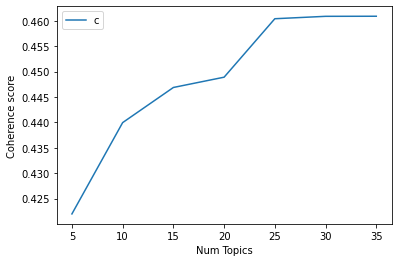

In [ ]:
limit=40; start=5; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 5  has Coherence Value of 0.422
Num Topics = 10  has Coherence Value of 0.44
Num Topics = 15  has Coherence Value of 0.4469
Num Topics = 20  has Coherence Value of 0.4489
Num Topics = 25  has Coherence Value of 0.4604
Num Topics = 30  has Coherence Value of 0.4609
Num Topics = 35  has Coherence Value of 0.4609


In [ ]:
# Select the model and print the topics
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(12,
  '0.031*"life" + 0.019*"world" + 0.016*"nature" + 0.016*"deep" + '
  '0.013*"experience" + 0.012*"feel" + 0.012*"heart" + 0.011*"create" + '
  '0.010*"spiritual" + 0.009*"beauty"'),
 (6,
  '0.288*"people" + 0.119*"meet" + 0.087*"thing" + 0.043*"make" + '
  '0.038*"person" + 0.036*"lot" + 0.033*"talk" + 0.033*"interesting" + '
  '0.019*"friend" + 0.017*"find"'),
 (3,
  '0.109*"year" + 0.062*"move" + 0.056*"back" + 0.054*"school" + 0.049*"bear" '
  '+ 0.040*"raise" + 0.038*"college" + 0.035*"grow" + 0.021*"recently" + '
  '0.021*"ago"'),
 (10,
  '0.062*"relationship" + 0.053*"woman" + 0.047*"man" + 0.026*"open" + '
  '0.023*"date" + 0.020*"partner" + 0.018*"interested" + 0.012*"sex" + '
  '0.011*"friendship" + 0.010*"important"'),
 (15,
  '0.038*"profile" + 0.034*"write" + 0.024*"message" + 0.020*"read" + '
  '0.020*"question" + 0.018*"site" + 0.018*"word" + 0.018*"date" + '
  '0.016*"give" + 0.014*"picture"'),
 (21,
  '0.058*"read" + 0.055*"thing" + 0.042*"book" + 0.029*"lot" + 0

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

In [ ]:
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7.0,0.3071,"people, good, friend, meet, time, person, guy,...","around new people i'm pretty shy and quiet, bu..."
1,1,6.0,0.1748,"relationship, woman, give, date, long, profile...",(movie preview voice) passion. desire. intrigu...
2,2,3.0,0.2105,"music, play, movie, watch, food, eat, hike, co...","21 year old student, born and raised in the ba..."
3,3,7.0,0.1378,"people, good, friend, meet, time, person, guy,...",i'm simple only that i can say
4,4,7.0,0.1830,"people, good, friend, meet, time, person, guy,...",down to earth. independent. friendly. dorky. f...
5,5,3.0,0.1729,"music, play, movie, watch, food, eat, hike, co...","fun, quirky, and armed with a nice repertoire ..."
6,6,0.0,0.1449,"life, world, share, feel, experience, importan...",-sf native -in advertising -dedicated -optimis...
7,7,3.0,0.2785,"music, play, movie, watch, food, eat, hike, co...","enjoying my new ""sf life""... i stay active and..."
8,8,6.0,0.2124,"relationship, woman, give, date, long, profile...","looking for ms. right -- ms. right now, that i..."
9,9,4.0,0.1851,"bit, make, stuff, girl, thing, read, bad, feel...",i'm an artist till the day i die. i live and b...


In [ ]:
df_dominant_topic.to_csv("okcupid60k_25topics.csv")

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2778,"enjoy, hike, outdoors, run, bike, beach, activ...",i'm a carpenter/handyman. i love outdoor activ...
1,1.0,0.6496,"work, hard, job, company, start, career, busin...",lon sterling james it / business / computer co...
2,2.0,0.2596,"guy, pretty, fun, girl, nice, friend, easy, ty...","my name is tonesha but i go by nesha f. baby, ..."
3,3.0,0.2664,"year, move, back, school, bear, raise, college...","i recently moved to the bay area ,from eastcoa..."
4,4.0,0.2510,"life, thing, make, happy, person, find, feel, ...","i'm a california-raised girl, of iranian desce..."


In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,16.0,"kid, car, wear, young, big, long, dress, child...",3599.0,0.0661
1.0,23.0,"food, good, eat, cook, drink, wine, coffee, be...",2000.0,0.0367
2.0,15.0,"profile, write, message, read, question, site,...",2856.0,0.0524
3.0,3.0,"year, move, back, school, bear, raise, college...",3369.0,0.0619
4.0,15.0,"profile, write, message, read, question, site,...",1600.0,0.0294
...,...,...,...,...
54453.0,12.0,"life, world, nature, deep, experience, feel, h...",NaN,NaN
54454.0,8.0,"day, walk, sleep, night, water, light, morning...",NaN,NaN
54455.0,14.0,"play, watch, enjoy, movie, sport, game, music,...",NaN,NaN
54456.0,23.0,"food, good, eat, cook, drink, wine, coffee, be...",NaN,NaN


In [ ]:
%pip freeze >> requirements.txt